In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [2]:
df = pd.read_csv('spotify_tracks_dataset.csv')
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [3]:
df.dropna(inplace=True)

In [4]:
df.drop(columns=['Unnamed: 0'], inplace= True)

In [5]:
df.drop_duplicates('track_id', inplace=True)

In [6]:
df.drop_duplicates(subset=['artists', 'album_name', 'track_name'], inplace=True)

In [7]:
df.drop_duplicates(subset=['artists', 'track_name'], inplace=True)

In [8]:
df.drop_duplicates(subset=['album_name', 'track_name'], inplace=True)

In [9]:
# Convert the 'explicit' column to numerical values and ensure it is of type int64
df['explicit'] = df['explicit'].astype('int64')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 80279 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          80279 non-null  object 
 1   artists           80279 non-null  object 
 2   album_name        80279 non-null  object 
 3   track_name        80279 non-null  object 
 4   popularity        80279 non-null  int64  
 5   duration_ms       80279 non-null  int64  
 6   explicit          80279 non-null  int64  
 7   danceability      80279 non-null  float64
 8   energy            80279 non-null  float64
 9   key               80279 non-null  int64  
 10  loudness          80279 non-null  float64
 11  mode              80279 non-null  int64  
 12  speechiness       80279 non-null  float64
 13  acousticness      80279 non-null  float64
 14  instrumentalness  80279 non-null  float64
 15  liveness          80279 non-null  float64
 16  valence           80279 non-null  float64
 1

In [11]:
df1 = df[df['speechiness'] <= 0.7]

In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 79433 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          79433 non-null  object 
 1   artists           79433 non-null  object 
 2   album_name        79433 non-null  object 
 3   track_name        79433 non-null  object 
 4   popularity        79433 non-null  int64  
 5   duration_ms       79433 non-null  int64  
 6   explicit          79433 non-null  int64  
 7   danceability      79433 non-null  float64
 8   energy            79433 non-null  float64
 9   key               79433 non-null  int64  
 10  loudness          79433 non-null  float64
 11  mode              79433 non-null  int64  
 12  speechiness       79433 non-null  float64
 13  acousticness      79433 non-null  float64
 14  instrumentalness  79433 non-null  float64
 15  liveness          79433 non-null  float64
 16  valence           79433 non-null  float64
 1

In [13]:
# Identify numeric and categorical columns

numeric_cols = []
categorical_cols = []
for col in df1.columns:
    if df1[col].dtype == np.float64 or df1[col].dtype == np.int64:
        numeric_cols.append(col)
    else:
        categorical_cols.append(col)

print('numeric columns:', numeric_cols)
print('Categorical columns:', categorical_cols)

numeric columns: ['popularity', 'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature']
Categorical columns: ['track_id', 'artists', 'album_name', 'track_name', 'track_genre']


In [14]:
# number of unique values in each numerical column
[df1[feature].nunique() for feature in numeric_cols]


[101,
 49143,
 2,
 1172,
 2075,
 12,
 19202,
 2,
 1304,
 5048,
 5338,
 1721,
 1789,
 43907,
 5]

In [15]:
df1['artists'].nunique()

30744

In [16]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 79433 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          79433 non-null  object 
 1   artists           79433 non-null  object 
 2   album_name        79433 non-null  object 
 3   track_name        79433 non-null  object 
 4   popularity        79433 non-null  int64  
 5   duration_ms       79433 non-null  int64  
 6   explicit          79433 non-null  int64  
 7   danceability      79433 non-null  float64
 8   energy            79433 non-null  float64
 9   key               79433 non-null  int64  
 10  loudness          79433 non-null  float64
 11  mode              79433 non-null  int64  
 12  speechiness       79433 non-null  float64
 13  acousticness      79433 non-null  float64
 14  instrumentalness  79433 non-null  float64
 15  liveness          79433 non-null  float64
 16  valence           79433 non-null  float64
 1

In [17]:
df2 = df1[df1['instrumentalness'] <= 0.9]
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 74203 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          74203 non-null  object 
 1   artists           74203 non-null  object 
 2   album_name        74203 non-null  object 
 3   track_name        74203 non-null  object 
 4   popularity        74203 non-null  int64  
 5   duration_ms       74203 non-null  int64  
 6   explicit          74203 non-null  int64  
 7   danceability      74203 non-null  float64
 8   energy            74203 non-null  float64
 9   key               74203 non-null  int64  
 10  loudness          74203 non-null  float64
 11  mode              74203 non-null  int64  
 12  speechiness       74203 non-null  float64
 13  acousticness      74203 non-null  float64
 14  instrumentalness  74203 non-null  float64
 15  liveness          74203 non-null  float64
 16  valence           74203 non-null  float64
 1

In [18]:
df3 = df2[df2['liveness'] <= 0.8]
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 71945 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          71945 non-null  object 
 1   artists           71945 non-null  object 
 2   album_name        71945 non-null  object 
 3   track_name        71945 non-null  object 
 4   popularity        71945 non-null  int64  
 5   duration_ms       71945 non-null  int64  
 6   explicit          71945 non-null  int64  
 7   danceability      71945 non-null  float64
 8   energy            71945 non-null  float64
 9   key               71945 non-null  int64  
 10  loudness          71945 non-null  float64
 11  mode              71945 non-null  int64  
 12  speechiness       71945 non-null  float64
 13  acousticness      71945 non-null  float64
 14  instrumentalness  71945 non-null  float64
 15  liveness          71945 non-null  float64
 16  valence           71945 non-null  float64
 1

In [19]:
df4 = df3[df3['duration_ms']!=0]
df4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 71945 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          71945 non-null  object 
 1   artists           71945 non-null  object 
 2   album_name        71945 non-null  object 
 3   track_name        71945 non-null  object 
 4   popularity        71945 non-null  int64  
 5   duration_ms       71945 non-null  int64  
 6   explicit          71945 non-null  int64  
 7   danceability      71945 non-null  float64
 8   energy            71945 non-null  float64
 9   key               71945 non-null  int64  
 10  loudness          71945 non-null  float64
 11  mode              71945 non-null  int64  
 12  speechiness       71945 non-null  float64
 13  acousticness      71945 non-null  float64
 14  instrumentalness  71945 non-null  float64
 15  liveness          71945 non-null  float64
 16  valence           71945 non-null  float64
 1

In [20]:
# Total columns = 14

n = 10

# Select only the integer and float columns
numeric_cols = df4.select_dtypes(include=['int64', 'float64'])

# Calculate the IQR for each column
Q1 = numeric_cols.quantile(0.25)
Q3 = numeric_cols.quantile(0.75)
IQR = Q3 - Q1

# Create a mask to identify outliers in each column
mask = (numeric_cols < (Q1 - 1.5 * IQR)) | (numeric_cols > (Q3 + 1.5 * IQR))

# Count the number of columns that each point is an outlier in
outlier_counts = mask.sum(axis=1)

# Remove points that are outliers in more than n columns
df_filtered = df4[outlier_counts <= n]
df_filtered.shape

(71945, 20)

In [21]:
# no outliers

* The outliers for "speechiness", "instrumentalness", and "time_signature" will not be removed. This data is too important and can be easily misleading if treated. For example treating "speechiness" and "instrumentalness" may remove rap songs on one end and classical on the other, both of which would have components of making a song popular. 
<br>

* The features "duration_ms", "liveness", and "loudness" will be transformed by the Yeo-Johnson method.

In [22]:
num_cols = ['popularity', 'duration_ms', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
df_num = df4[num_cols]

for col in num_cols:
    q1 = df4[col].quantile(0.25)
    q3 = df4[col].quantile(0.75)
    iqr = q3 - q1
    upper_boundary = q3 + 1.5 * iqr
    lower_boundary = q1 - 1.5 * iqr
    outliers = df4[(df4[col] < lower_boundary) | (df4[col] > upper_boundary)][col]
    outlier_percent = outliers.count() / df4[col].count() * 100
    print(f"{col} has {outlier_percent}% outliers")

popularity has 0.015289457224268539% outliers
duration_ms has 4.622975884356105% outliers
danceability has 0.419765098339009% outliers
energy has 0.0% outliers
loudness has 4.274098269511432% outliers
speechiness has 11.62971714504135% outliers
acousticness has 0.0% outliers
instrumentalness has 21.886163041212036% outliers
liveness has 5.532003613871708% outliers
valence has 0.0% outliers
tempo has 0.3030092431718674% outliers


* The Yeo-Johnson was able to reduce the percentage of outliers in "loudness" by over 50%.
<br>

* The percentage of outliers for "liveness" was reduced to 0.0%.
<br>
* The "duration_ms" feature's percentage of outliers was not significantly reduced.
<br>
* Being that the goal of outlier detection is to identify values that are significantly outside the general distribution of the data, the wise choice seems to be to leave the data as is within a 1.5 IQR multiplier. Some songs are just LONG.


we wont remove outliers for speechiness, instrumentalness, and liveness because we have already handeled the outliers for these while dta clening above.

popularity, danceability, energy, loudness, acousticness, valence and tempo have no or neglidgible number of outliers

for duration we wont remove outliers because it doesnt make any sense



In [23]:
df_t = df4.copy()


C:\Users\daksh\AppData\Local\Temp\ipykernel_30036\1902761791.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_t[col], ax=axes[row_idx, col_idx], kde=True)
C:\Users\daksh\AppData\Local\Temp\ipykernel_30036\1902761791.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_t[col], ax=axes[row

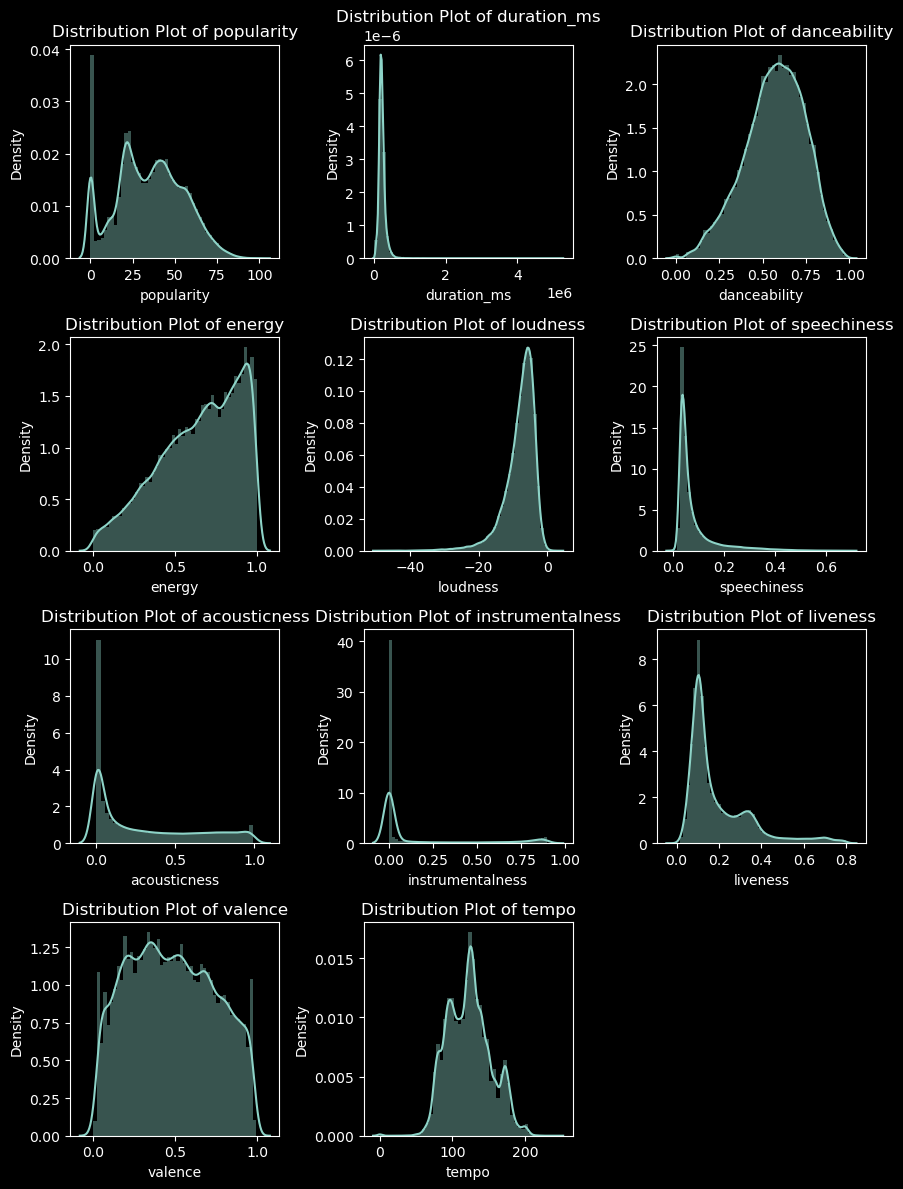

In [24]:
n_cols = len(num_cols)
n_rows = int(np.ceil(n_cols / 3))

fig, axes = plt.subplots(n_rows, 3, figsize=(9, 3*n_rows))

for i, col in enumerate(num_cols):
    row_idx = i // 3
    col_idx = i % 3
    sns.distplot(df_t[col], ax=axes[row_idx, col_idx], kde=True)

    axes[row_idx, col_idx].set_title(f"Distribution Plot of {col}")
    axes[row_idx, col_idx].set_xlabel(col)

for i in range(n_cols, n_rows*3):
    fig.delaxes(axes.flatten()[i])

fig.tight_layout()

plt.show()

In [25]:
# data = df_t[['popularity', 'duration_ms', 'danceability', 'energy', 
#             'loudness', 'speechiness', 'acousticness', 'instrumentalness', 
#             'liveness', 'valence', 'tempo']]

# # iterate through each column and perform K-S test
# for col in data.columns:
#     kstest_result = stats.kstest(data[col], 'norm')

#     # Print the test statistic and p-value for each column
#     print(f"{col} - K-S test statistic:", kstest_result.statistic)
#     print(f"{col} - p-value:", kstest_result.pvalue)

In [26]:
# # Checking if any transformations will achieve a more normal distribution.

# num_cols = ['popularity', 'duration_ms', 'danceability', 'energy', 
#             'loudness', 'speechiness', 'acousticness', 'instrumentalness', 
#             'liveness', 'valence', 'tempo']

# new_df = pd.DataFrame()
# for col_name in num_cols:
#     new_df[f'log({col_name})'] = np.log1p(df_t[col_name])
#     new_df[f'sqrt({col_name})'] = np.sqrt(df_t[col_name])
#     new_df[f'exp({col_name})'] = np.exp(df_t[col_name])

# plot_cols = 3

# fig_width = 8
# fig_height = 25
# subplot_width = fig_width / plot_cols
# subplot_height = fig_height / (len(num_cols) / plot_cols)

# fig, axes = plt.subplots(len(num_cols), plot_cols, figsize=(fig_width, fig_height))

# # Loop through each column/transformation combination and plot using subplots with Seaborn
# for i, col_name in enumerate(num_cols):
#     for j, transform in enumerate(['log', 'sqrt', 'exp']):
#         plot_data = new_df[f"{transform}({col_name})"]
#         plot_title = f"{transform}({col_name})"
#         ax = axes[i, j]
#         sns.kdeplot(plot_data, ax=ax)
#         ax.set_title(plot_title)

# # Adjust spacing and labels
# plt.tight_layout()
# plt.subplots_adjust(hspace=0.6, wspace=0.3)
# plt.show()

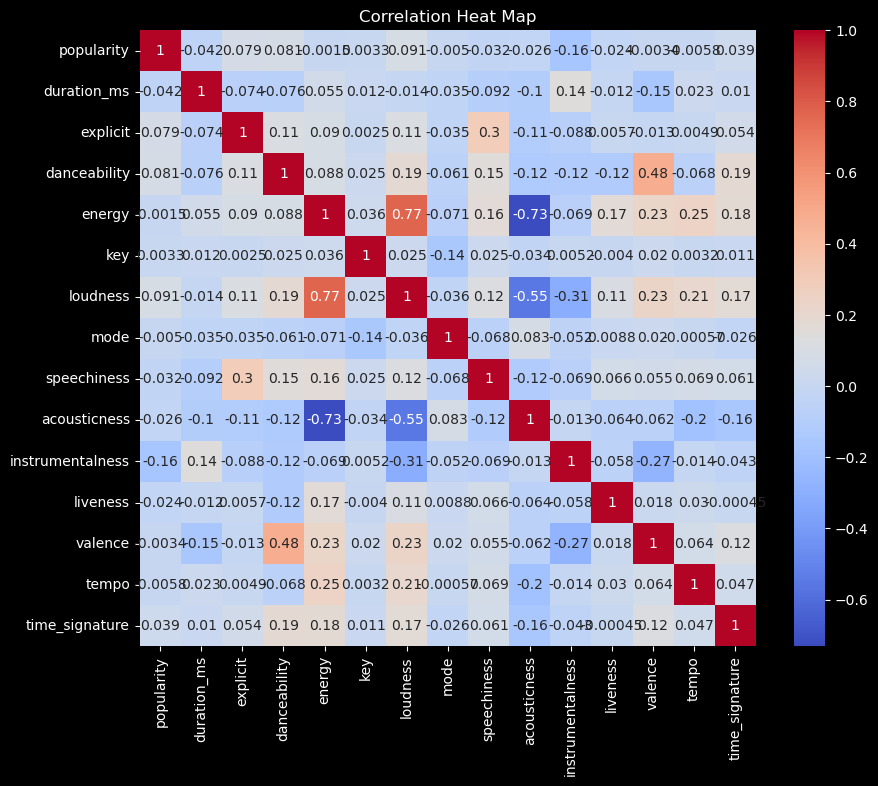

In [27]:
corr_matrix = df4.corr(numeric_only=True)

# Create a heat map of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Heat Map')
plt.show()

strong correlation between loundness and energy;
acoustiness and energy have strong inverse correlation

#### Checking the Balance of Categorical Features

In [28]:
continuous_cols = []
categorical_cols = []
for col in df_t.columns:
    if df_t[col].dtype == np.float64 or df_t[col].dtype == np.int64:
        continuous_cols.append(col)
    else:
        categorical_cols.append(col)

print('Continuous columns:', continuous_cols)
print('Categorical columns:', categorical_cols)

Continuous columns: ['popularity', 'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature']
Categorical columns: ['track_id', 'artists', 'album_name', 'track_name', 'track_genre']


In [29]:
# # Iterate through each column in categorical_cols
# for column in categorical_cols:
#     plt.figure(figsize=(8, 3))
#     sns.countplot(x=column, data=df_t)
#     plt.title(f'Distribution of unique values in {column}')
#     plt.xticks(rotation=90)
#     plt.show()

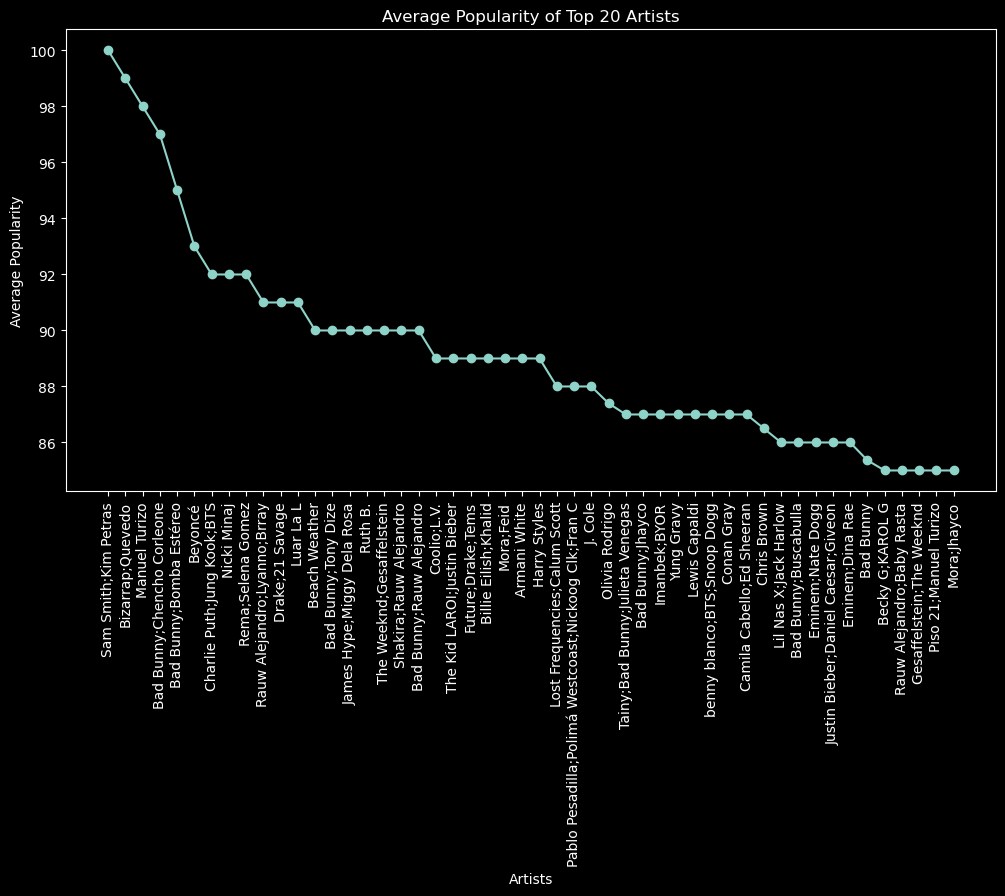

In [30]:
# Group by 'artists' and calculate the average popularity
artist_popularity = df_t.groupby('artists')['popularity'].mean().reset_index()

# Sort the values by popularity for better visualization
artist_popularity = artist_popularity.sort_values(by='popularity', ascending=False)

# Limit the number of artists displayed to avoid clutter
top_artists = artist_popularity.head(50)
# top_artists = artist_popularity

# Plot the line graph
plt.figure(figsize=(12, 6))
plt.plot(top_artists['artists'], top_artists['popularity'], marker='o')
plt.xticks(rotation=90)
plt.xlabel('Artists')
plt.ylabel('Average Popularity')
plt.title('Average Popularity of Top 20 Artists')
plt.show()

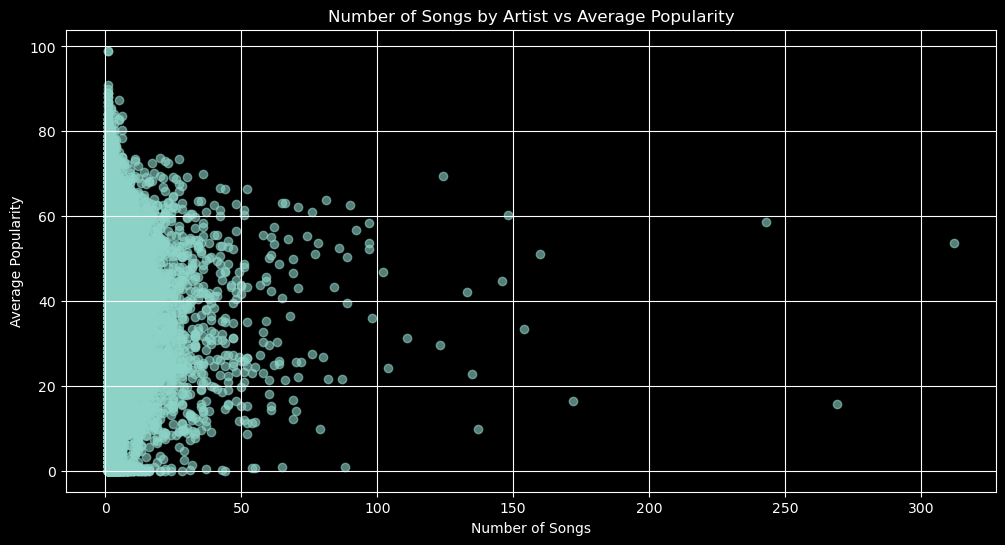

In [31]:
# Split the artists column by delimiter ';'
df_t['artists'] = df_t['artists'].str.split(';')

# Explode the artists column to have one artist per row
df_exploded = df_t.explode('artists')

# Group by 'artists' and calculate the number of songs and average popularity
artist_stats = df_exploded.groupby('artists').agg(
    num_songs=('track_id', 'count'),
    avg_popularity=('popularity', 'mean')
).reset_index()

# Plot the data
plt.figure(figsize=(12, 6))
plt.scatter(artist_stats['num_songs'], artist_stats['avg_popularity'], alpha=0.6)
plt.xlabel('Number of Songs')
plt.ylabel('Average Popularity')
plt.title('Number of Songs by Artist vs Average Popularity')
plt.grid(True)
plt.show()

In [32]:
# Drop specified columns
df4.drop(['artists', 'album_name', 'track_name', 'track_id'], axis=1, inplace=True)

# Reset the index to default integer indexing
df4.reset_index(drop=True, inplace=True)

# Display the updated dataframe information
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71945 entries, 0 to 71944
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   popularity        71945 non-null  int64  
 1   duration_ms       71945 non-null  int64  
 2   explicit          71945 non-null  int64  
 3   danceability      71945 non-null  float64
 4   energy            71945 non-null  float64
 5   key               71945 non-null  int64  
 6   loudness          71945 non-null  float64
 7   mode              71945 non-null  int64  
 8   speechiness       71945 non-null  float64
 9   acousticness      71945 non-null  float64
 10  instrumentalness  71945 non-null  float64
 11  liveness          71945 non-null  float64
 12  valence           71945 non-null  float64
 13  tempo             71945 non-null  float64
 14  time_signature    71945 non-null  int64  
 15  track_genre       71945 non-null  object 
dtypes: float64(9), int64(6), object(1)
memor

In [33]:
df4.to_csv('spotify_tracks_dataset_processed.csv')

In [34]:
label_encoder = LabelEncoder()

df5 = df4.copy()

# Fit and transform the 'track_genre' column
df5['track_genre_encoded'] = label_encoder.fit_transform(df5['track_genre'])

# Drop the original 'track_genre' column
# df4.drop('track_genre', axis=1, inplace=True)

# Display the updated dataframe
df5.head()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,track_genre_encoded
0,73,230666,0,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic,0
1,55,149610,0,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic,0
2,57,210826,0,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic,0
3,71,201933,0,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic,0
4,82,198853,0,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic,0


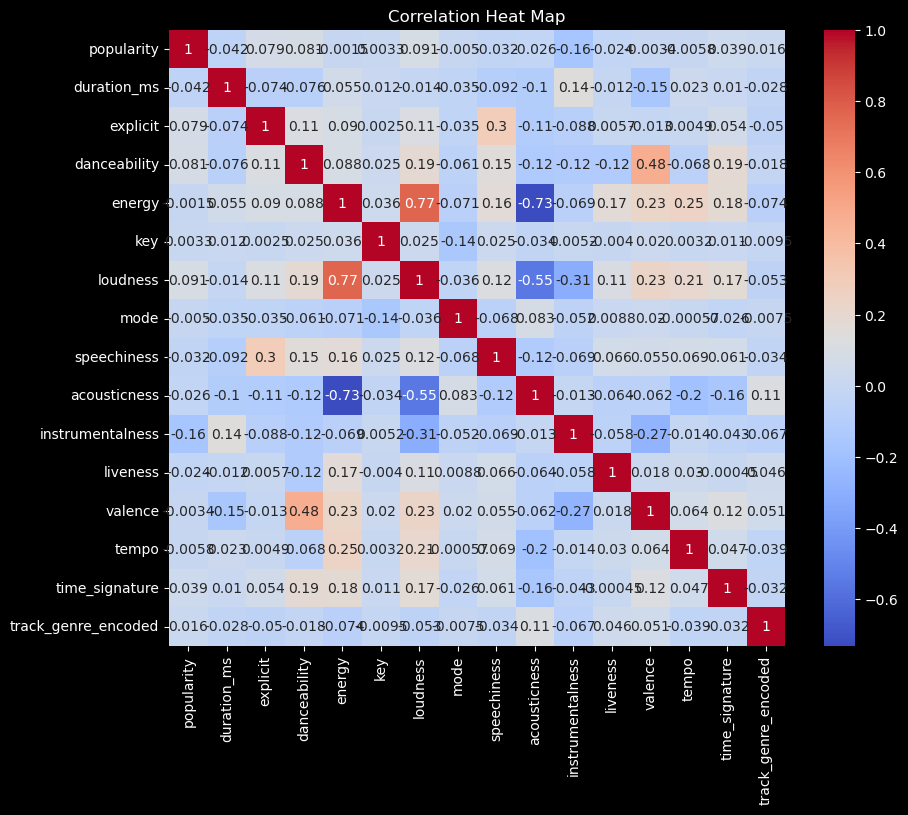

In [35]:
corr_matrix = df5.corr(numeric_only=True)

# Create a heat map of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Heat Map')
plt.show()

In [36]:
df5.to_csv('spotify_tracks_dataset_lable_encoded.csv')

In [37]:
# %pip install category_encoders
import category_encoders as ce

# Initialize the TargetEncoder
target_encoder = ce.TargetEncoder(cols=['track_genre'])

df6 = df4.copy()

# Fit and transform the 'track_genre' column
df6['track_genre_encoded'] = target_encoder.fit_transform(df6['track_genre'], df6['popularity'])

# Display the updated dataframe
df6.head()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,track_genre_encoded
0,73,230666,0,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic,43.340934
1,55,149610,0,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic,43.340934
2,57,210826,0,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic,43.340934
3,71,201933,0,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic,43.340934
4,82,198853,0,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic,43.340934


In [38]:
df6['track_genre_encoded'].describe()

count    71945.000000
mean        35.045144
std         11.882304
min          1.837644
25%         26.624540
50%         36.026168
75%         43.340934
max         59.305952
Name: track_genre_encoded, dtype: float64

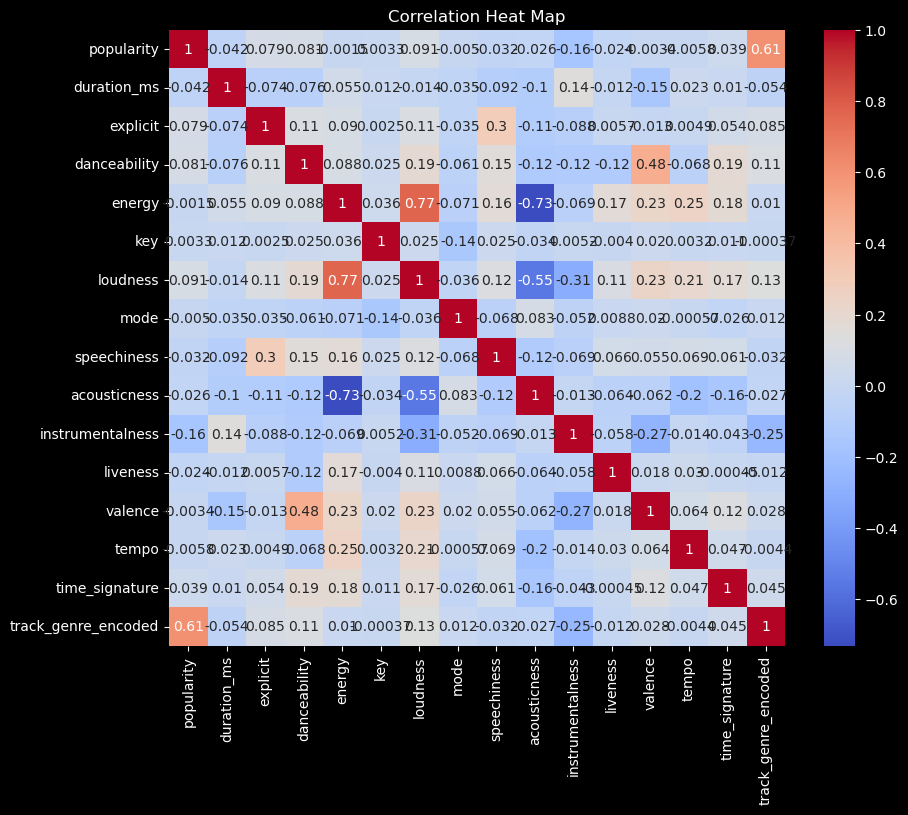

In [39]:
corr_matrix = df6.corr(numeric_only=True)

# Create a heat map of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Heat Map')
plt.show()

In [40]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71945 entries, 0 to 71944
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   popularity           71945 non-null  int64  
 1   duration_ms          71945 non-null  int64  
 2   explicit             71945 non-null  int64  
 3   danceability         71945 non-null  float64
 4   energy               71945 non-null  float64
 5   key                  71945 non-null  int64  
 6   loudness             71945 non-null  float64
 7   mode                 71945 non-null  int64  
 8   speechiness          71945 non-null  float64
 9   acousticness         71945 non-null  float64
 10  instrumentalness     71945 non-null  float64
 11  liveness             71945 non-null  float64
 12  valence              71945 non-null  float64
 13  tempo                71945 non-null  float64
 14  time_signature       71945 non-null  int64  
 15  track_genre          71945 non-null 

In [41]:
df6.to_csv('spotify_tracks_dataset_target_encoded.csv')

In [42]:
df7 = df4.copy()

# Calculate average popularity for each genre
genre_popularity = df7.groupby('track_genre')['popularity'].mean().sort_values(ascending=False)

# Sort genres based on average popularity
sorted_genres = genre_popularity.index.tolist()

# Initialize LabelEncoder
le = LabelEncoder()

# Fit LabelEncoder with sorted genres
le.fit(sorted_genres)

# Encode the 'track_genre' column
df7['track_genre_encoded'] = le.transform(df7['track_genre'])

# Display the updated dataframe
df7.head()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,track_genre_encoded
0,73,230666,0,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic,0
1,55,149610,0,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic,0
2,57,210826,0,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic,0
3,71,201933,0,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic,0
4,82,198853,0,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic,0


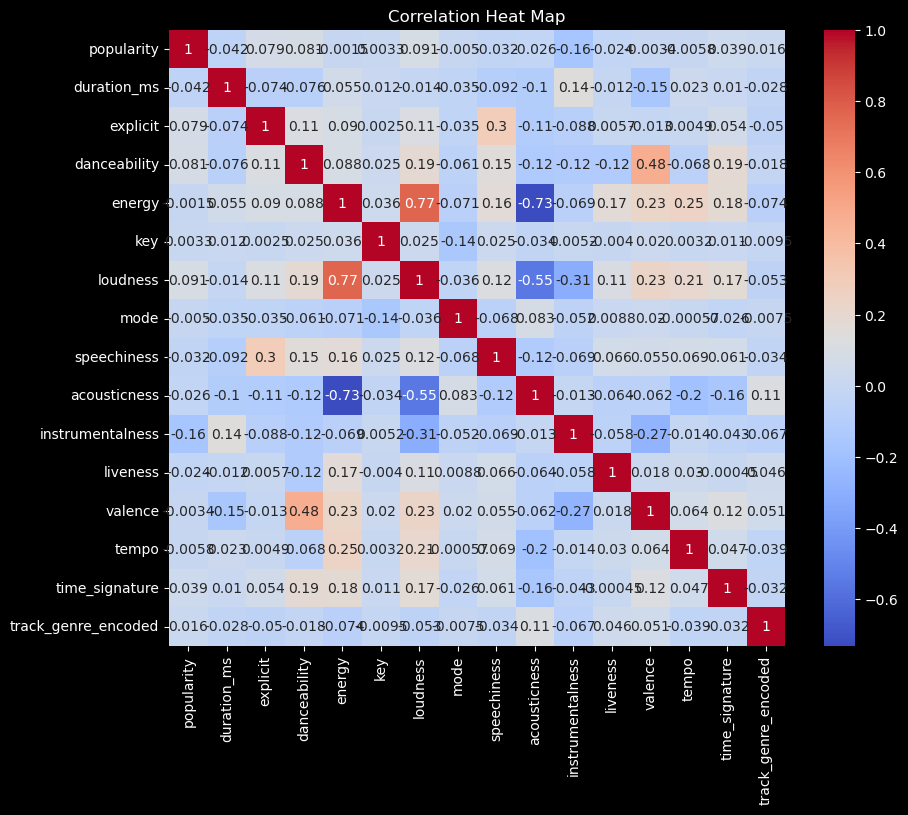

In [43]:
corr_matrix = df7.corr(numeric_only=True)

# Create a heat map of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Heat Map')
plt.show()

In [44]:
df7.to_csv('spotify_tracks_dataset_sorted_lable_encoded.csv')

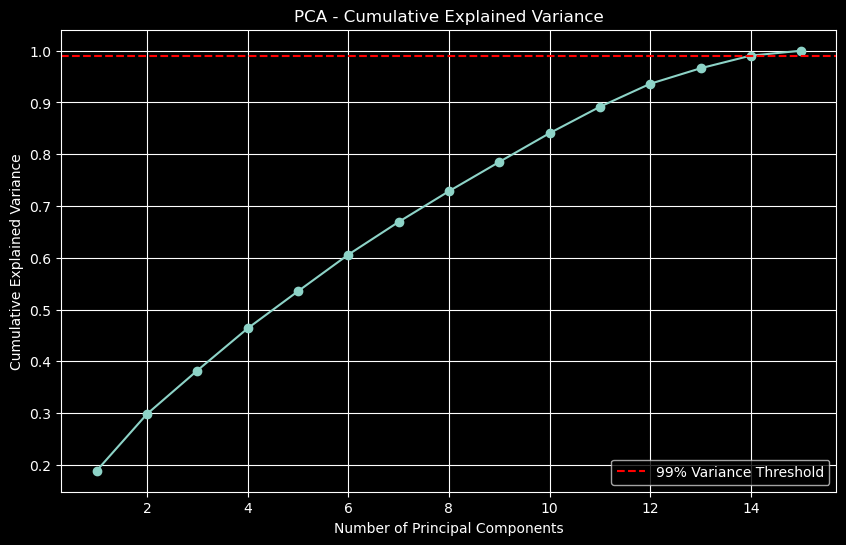

Number of components to retain for 99% variance: 14


,track_genre,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
0,acoustic,0.749424,1.235547,0.145404,0.194668,1.061571,-0.397303,-1.672959,-0.485622,-1.672390,0.882492,0.735971,0.837063,0.275107,-0.740298
1,acoustic,-3.547545,1.523202,-0.205777,1.040803,0.402403,-1.218273,-0.614529,0.391845,-0.439892,-0.373703,-0.443188,0.760251,0.401718,-0.301811
2,acoustic,-1.522503,0.126151,-0.524863,0.963225,0.728030,-1.914113,-0.950539,-0.413097,-0.473790,-0.831746,-0.554062,0.808798,-0.274348,-0.604167
3,acoustic,-4.046006,-0.069072,-0.840578,2.495891,1.139575,-0.921618,2.328922,0.354457,-0.738564,1.618465,0.680607,0.070932,-0.113594,-0.576919
4,acoustic,-1.064635,0.820859,-0.630042,0.712730,1.507792,-2.067909,0.193466,0.408474,-0.421036,-0.115468,0.490867,0.730279,-0.666543,0.061642


In [45]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd

# Select numerical columns
numeric_cols = df4.select_dtypes(include=['int64', 'float64']).columns

# Standardize the numerical features
scaler = StandardScaler()
df4_scaled = scaler.fit_transform(df4[numeric_cols])

# Apply PCA
pca = PCA()
pca.fit(df4_scaled)

# Calculate the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Plot the cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio.cumsum(), marker='o')
plt.axhline(y=0.99, color='r', linestyle='--', label='99% Variance Threshold')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA - Cumulative Explained Variance')
plt.legend()
plt.grid(True)
plt.show()

# Determine the number of components to retain (99% variance)
cumulative_variance = explained_variance_ratio.cumsum()
num_components = (cumulative_variance < 0.99).sum() + 1
print(f'Number of components to retain for 99% variance: {num_components}')

# Transform the data using the selected number of components
pca = PCA(n_components=num_components)
df4_pca = pca.fit_transform(df4_scaled)

# Create a DataFrame with the principal components
df4_pca_df = pd.DataFrame(df4_pca, columns=[f'PC{i+1}' for i in range(num_components)])
df4_pca_df.head()

# (Optional) Drop original numerical columns and concatenate PCA components
df_final = df4.drop(numeric_cols, axis=1).reset_index(drop=True)
df_final = pd.concat([df_final, df4_pca_df], axis=1)

# Display the updated dataframe
df_final.head()

In [46]:
df4['track_genre'].nunique()

113